## 確認套件已經安裝 & Get data

In [0]:
import warnings
warnings.filterwarnings('ignore')

# !pip install -q keras

import os
import numpy as np
import pandas as pd
import keras

from google.colab import files

from sklearn.utils import shuffle
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

## 讀取我們建立的 `pkgo.csv`

### 將本機端的 `pkgo_nyc_5class.csv.bz2` 上傳到 colab

In [0]:
if not os.path.exists('pkgo_nyc_5class.csv.bz2'):
    uploaded = files.upload()

### 讀取 `pkgo.csv`

In [15]:
pkgo = pd.read_csv('pkgo_nyc_5class.csv.bz2')
pd.set_option('display.max_columns', pkgo.shape[-1])
pkgo.head()

,latitude,longitude,local.month,local.day,local.hour,local.minute,local.second,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,0.004751,-0.617821,9,8,2,51,33,4,4,51,1,8,8,13,0,66,2,5,0.398699,-0.575073,0.381108,-0.146583,0.232271,-0.387781,1.062391,1.344779,-0.165696,-0.088117,-0.150112,-1.365225,-0.226178,1,1,1,0,-0.090562,0,0,1,1,1,1,-0.083927,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.073257,-0.703223,9,8,2,50,45,4,4,50,1,8,8,13,0,66,2,5,0.511728,-0.119994,0.261039,0.043340,1.205380,1.832383,-1.399058,1.123627,0.624227,-0.088117,1.419163,-1.142499,-0.479165,0,0,1,0,-0.102661,0,1,1,1,1,1,-0.050915,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.001167,-0.612492,9,8,2,37,31,4,4,37,1,8,8,13,0,66,2,21,0.447140,0.021320,0.591230,-0.132383,0.232271,-0.387781,1.062391,1.148199,-0.198609,-0.088117,-0.215498,-1.171869,-0.574540,0,0,1,0,-0.018548,0,0,0,0,1,1,0.070019,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.208499,-0.532359,9,8,2,34,37,4,4,34,1,8,8,5,0,66,2,5,-0.231035,-0.254122,-1.650065,0.006066,-0.825457,-0.387781,-0.600750,1.283348,-0.823964,-0.088117,-1.457840,-1.291799,-0.226178,1,1,1,0,1.053647,0,0,0,0,0,0,0.023324,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

### 將 `pkgo` 切分為訓練神經網路用的輸入值 (input) `X` 和實際值 (actual values) `y`

In [0]:
def Xy_split(pkgo):
    num_cols = pkgo.shape[1]
    X = pkgo.iloc[:, :num_cols-1]
    y = pkgo['class']
    
    # 型別轉換，確保資料型態正確
    X = X.astype(np.float32)
    y = y.astype(np.int)
    
    # 對 y 做 one-hot encoding
    y = to_categorical(y)
    
    # 打亂資料集
    X, y = shuffle(X, y)
    
    return X, y

X, y = Xy_split(pkgo)

# 開始建立第一個模型 

In [0]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD, Adam

## 步驟 1+2：設計模型架構 (深度與寬度) & 選擇啟動函數 (activation function)

In [18]:
# 宣告這是一個 Sequential 次序性的深度學習模型
model = Sequential()

# 加入第一層 hidden layer (128 neurons) 與指定 input 的維度
model.add(Dense(128, input_dim=X.shape[-1]))

# 指定 activation function
model.add(Activation('sigmoid'))

# 加入第二層 hidden layer (256 neurons)
model.add(Dense(256))
model.add(Activation('sigmoid'))

# 加入 output layer (5 neurons)
model.add(Dense(5))
model.add(Activation('softmax'))

# 觀察 model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               25728     
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 1285      
_________________________________________________________________
activation_6 (Activation)    (None, 5)                 0         
Total params: 60,037
Trainable params: 60,037
Non-trainable params: 0
_________________________________________________________________


## 步驟 3：選擇損失函數

In [0]:
loss_fun = 'categorical_crossentropy'

## 步驟 4：選擇優化器 (optimizer)

In [0]:
from keras.optimizers import SGD, Adagrad, RMSprop

optim = SGD(lr=10e-3, momentum=0.0, decay=0.0, nesterov=False)

## 步驟 5：編譯模型

In [0]:
# 模型在訓練前需要編譯
# 我們指定使用 categorical_crossentropy 當我們的損失函數，
# 指定 SGD 當我們的優化器
model.compile(loss=loss_fun,
              optimizer=optim,
              metrics=['accuracy'])

## 步驟 6：開始訓練

In [0]:
# 設定訓練樣本數 batch_size，訓練迭代輪次(回合數) epochs
batch_size = 32
epochs = 30

# 開始訓練模型
fitting_history = \
    model.fit(X, y,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              shuffle=True,  # 在每輪迭代開始前打混數據
              validation_split=0.1)  # 用在作為驗證集數據的比例

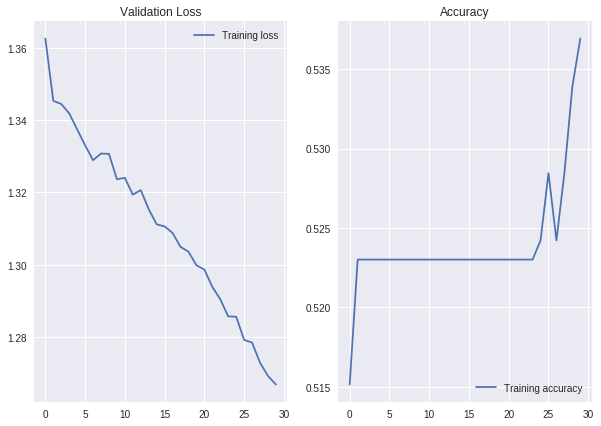

In [23]:
loss = fitting_history.history.get('loss')
val_loss = fitting_history.history.get('val_loss')
acc = fitting_history.history.get('acc')
val_acc = fitting_history.history.get('val_acc')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

''' Visualize the loss and accuracy of both models'''
plt.figure(0)

plt.subplot(121)

plt.plot(range(len(loss)), loss, label='Training loss')
# plt.plot(range(len(val_loss)), val_loss, label='Validation loss')
plt.title('Validation Loss')
plt.legend(loc='upper right')

plt.subplot(122)

plt.plot(range(len(acc)), acc, label='Training accuracy')
# plt.plot(range(len(val_acc)), val_acc, label='Validation accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

plt.show()